In [42]:
!pip install threadpoolctl==3.1.0

  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


# ADP 26회 실기 문제

# 머신러닝 - 데이터 설명
- 데이터 설명
    - InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.     
    - StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.     
    - Description: Product (item) name. Nominal.    
    - Quantity: The quantities of each product (item) per transaction. Numeric.     
    - InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.   
    - UnitPrice: Unit price. Numeric, Product price per unit in sterling.    
    - CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.     
    - Country: Country name. Nominal, the name of the country where each customer resides.  
    
- 출처 : - https://archive.ics.uci.edu/ml/index.phpm
- 데이터url : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/26/problem1.csv

In [44]:
import pandas as pd
df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/26/problem1.csv')

## 문제1.1 
결측치를 확인 하고, 결측치 제거 또는 대치하고 방법에 대해 설명하라

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35801 entries, 0 to 35800
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    35801 non-null  object 
 1   StockCode    35801 non-null  object 
 2   Description  35801 non-null  object 
 3   Quantity     35776 non-null  float64
 4   InvoiceDate  35801 non-null  object 
 5   UnitPrice    35704 non-null  float64
 6   CustomerID   35801 non-null  float64
 7   Country      35801 non-null  object 
dtypes: float64(3), object(5)
memory usage: 2.2+ MB


In [46]:
# 결측치를 확인해보자 
print(df.isnull().sum())
print('Quantity변수와UnitPrice에서 결측치가 확인된다.')

InvoiceNo       0
StockCode       0
Description     0
Quantity       25
InvoiceDate     0
UnitPrice      97
CustomerID      0
Country         0
dtype: int64
Quantity변수와UnitPrice에서 결측치가 확인된다.


In [47]:
print('결측치가 있는 두 변수 모두 수치형이므로, 대표값중 이상값에 민감하지 않은 각 변수의 중앙값으로 결측치를 대치한다.')
df['Quantity'].fillna(df['Quantity'].median(),inplace = True)
df['UnitPrice'].fillna(df['UnitPrice'].median(),inplace = True)

print(df.info())
print('결측치가 사라졌음을 알 수 있다.')


결측치가 있는 두 변수 모두 수치형이므로, 대표값중 이상값에 민감하지 않은 각 변수의 중앙값으로 결측치를 대치한다.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35801 entries, 0 to 35800
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    35801 non-null  object 
 1   StockCode    35801 non-null  object 
 2   Description  35801 non-null  object 
 3   Quantity     35801 non-null  float64
 4   InvoiceDate  35801 non-null  object 
 5   UnitPrice    35801 non-null  float64
 6   CustomerID   35801 non-null  float64
 7   Country      35801 non-null  object 
dtypes: float64(3), object(5)
memory usage: 2.2+ MB
None
결측치가 사라졌음을 알 수 있다.


## 문제1.2 
이상치를 제거하는 방법을 설명하고, 이상치 제거 전 후 결과에 대해 통계적인 방법을 포함하여 설명할 것

In [48]:
df._get_numeric_data().columns.tolist()

['Quantity', 'UnitPrice', 'CustomerID']

이상치를 제거하는 방법으로는 이상치 경계값을 벗어나는 값들을 절단하는 방법, 이상치 경계값으로 조정하는 방법등이 있다. 이상치 제거는 수치형 변수에 대해서 실행할 수 있는데, CustomerID는 수치형 변수가 아닌 범주형변수로 보는 것이 타당하므로, Quantity와 UnitPrice에 대해서 이상치를 확인하고 경계값으로 조정하기로 한다.


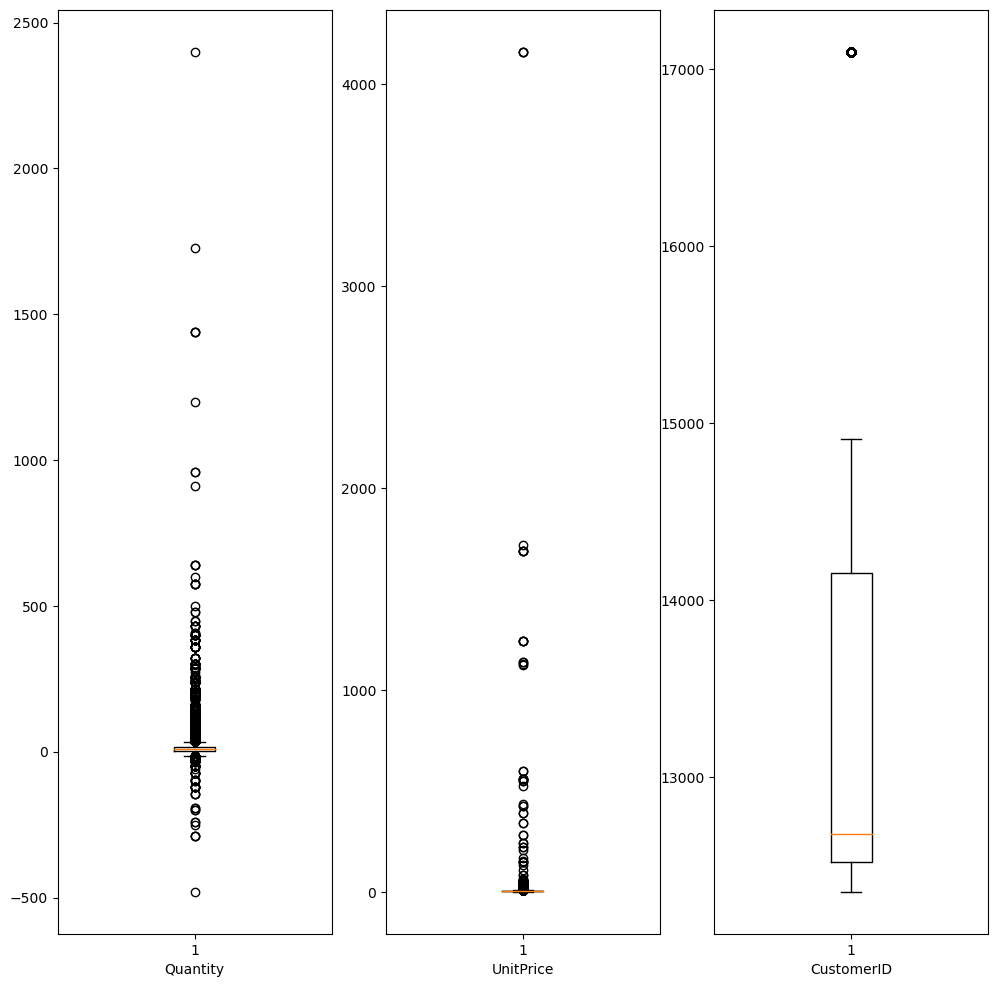

In [50]:
print('이상치를 제거하는 방법으로는 이상치 경계값을 벗어나는 값들을 절단하는 방법, 이상치 경계값으로 조정하는 방법등이 있다. 이상치 제거는 수치형 변수에 대해서 실행할 수 있는데, CustomerID는 수치형 변수가 아닌 범주형변수로 보는 것이 타당하므로, Quantity와 UnitPrice에 대해서 이상치를 확인하고 경계값으로 조정하기로 한다.')
from matplotlib import pyplot as plt
fig, axes = plt.subplots(1,3, figsize = (12,12))
for ax, col in zip(axes.ravel(), df._get_numeric_data().columns.tolist()):
    ax.boxplot(df[col])
    ax.set_xlabel(col)
plt.show()

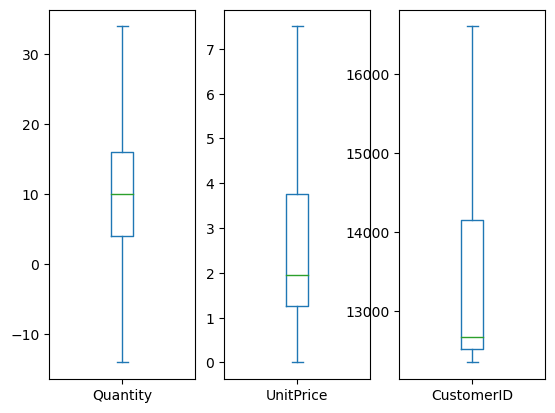

이상치 조정 전
           Quantity     UnitPrice
count  35801.000000  35801.000000
mean      18.420156      4.604789
std       42.148291     48.017553
min     -480.000000      0.000000
25%        4.000000      1.250000
50%       10.000000      1.950000
75%       16.000000      3.750000
max     2400.000000   4161.060000 

이상치 조정 후
           Quantity     UnitPrice
count  35801.000000  35801.000000
mean      12.078378      2.754340
std       10.138728      2.245701
min      -14.000000      0.000000
25%        4.000000      1.250000
50%       10.000000      1.950000
75%       16.000000      3.750000
max       34.000000      7.500000


In [51]:
# 조정 후 결과

df2 = df.copy()
for feat in df._get_numeric_data().columns.tolist():
    IQR = df2[feat].quantile(0.75) -df2[feat].quantile(0.25)
    down = df2[feat].quantile(0.25) - IQR * 1.5
    up = df2[feat].quantile(0.75) + IQR * 1.5
    df2[feat] = df2[feat].clip(down, up)
df2.plot(kind = 'box', subplots = True)
plt.show()

print('이상치 조정 전')
print(df[['Quantity', 'UnitPrice']].describe(),'\n')

print('이상치 조정 후')
print(df2[['Quantity', 'UnitPrice']].describe())

## 문제1.3 
각 StockCode을 기준으로 파생변수들을 만들고 제품들의 특성에 따른 군집 생성을 위한 전처리를 수행하라. 

## 문제 2.1 
Kmeans , DBSCAN 방법 중 하나를 선택하여 군집분석을 시행하고 각 군집별 특성을 분석하라

In [52]:
print('군집 생성은 수치형 변수를통해서 가능하기 때문에 범주형 변수의 경우 더미 코딩해야한다.')
print('범주형 변수들 중에서 범주의 개수가 10개 이하인 Country만 전처리하고, 거리기반 모델이기 때분에 변수들의 척도 차이를 제거하기 위해 스케일링을 진행하여 군집을 생성하기로 한다.')
print('또한, 척도의 차이로 인한 결과의 왜곡을 피하기 위해 표준화방법으로 feature Scaling 도 진행한다.')
print('k-means modeling으로 적정한 군집의 개수를 정하기 위해 오차 제곱합의 평균으로 엘보우 플롯을 그려서 비교하였다.')
print('군집의 개수가 3에서 4가 될 때 플롯이 평평해지므로 모델이 더 개선된다고 보기 어렵기때문에 군집의 개수를 3으로 선정하였다.')

print('\n\n한편, DBSCAN modeling으로 적정한 군집의 개수를 정하기 위해 eps 후보군들의 군집 결과를 시각화 하고 , 실루엣 계수로 결과를 비교하였다.')
print('실루엣 스코어 상의 성능과 실용적인 군집의 개수를 생각했을 때 4로 선택하기로 한다.')



군집 생성은 수치형 변수를통해서 가능하기 때문에 범주형 변수의 경우 더미 코딩해야한다.
범주형 변수들 중에서 범주의 개수가 10개 이하인 Country만 전처리하고, 거리기반 모델이기 때분에 변수들의 척도 차이를 제거하기 위해 스케일링을 진행하여 군집을 생성하기로 한다.
또한, 척도의 차이로 인한 결과의 왜곡을 피하기 위해 표준화방법으로 feature Scaling 도 진행한다.
k-means modeling으로 적정한 군집의 개수를 정하기 위해 오차 제곱합의 평균으로 엘보우 플롯을 그려서 비교하였다.
군집의 개수가 3에서 4가 될 때 플롯이 평평해지므로 모델이 더 개선된다고 보기 어렵기때문에 군집의 개수를 3으로 선정하였다.


한편, DBSCAN modeling으로 적정한 군집의 개수를 정하기 위해 eps 후보군들의 군집 결과를 시각화 하고 , 실루엣 계수로 결과를 비교하였다.
실루엣 스코어 상의 성능과 실용적인 군집의 개수를 생각했을 때 4로 선택하기로 한다.


In [53]:
# 군집생성은 수치형 변수를 통해서 가능 -> 범주형 변수의 경우 더미코딩을 해야 함.
print('범주형 변수들 중 범주의 개수가 10개 이하인 Country만 전처리하고, 거리기반 모델이기 때문에 변수들의 척도 차이를 제거하기 위해 스케일링을 진행하여 군집을 생성하기로 한다.')
for feat in df2.columns:
    if df2[feat].dtypes == object:
        print(feat, df2[feat].nunique())
        
df3 = df2[['Quantity','UnitPrice', 'Country']]
from pandas import get_dummies
df3 = get_dummies(df3,drop_first = True)
df3.head(3)

범주형 변수들 중 범주의 개수가 10개 이하인 Country만 전처리하고, 거리기반 모델이기 때문에 변수들의 척도 차이를 제거하기 위해 스케일링을 진행하여 군집을 생성하기로 한다.
InvoiceNo 1846
StockCode 2668
Description 2763
InvoiceDate 1827
Country 8


,Quantity,UnitPrice,Country_EIRE,Country_France,Country_Germany,Country_Netherlands,Country_Portugal,Country_Spain,Country_Switzerland
0,6.0,1.95,0,0,1,0,0,0,0
1,12.0,1.25,1,0,0,0,0,0,0
2,12.0,1.25,0,0,0,0,0,0,0


In [54]:
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame

ss=StandardScaler()
scaled = ss.fit_transform(df3)
df4 = DataFrame(scaled, columns = df3.columns)
df4.head(3)

,Quantity,UnitPrice,Country_EIRE,Country_France,Country_Germany,Country_Netherlands,Country_Portugal,Country_Spain,Country_Switzerland
0,-0.599529,-0.358174,-0.514138,-0.557595,1.664485,-0.266316,-0.207659,-0.275933,-0.235222
1,-0.007731,-0.669885,1.945002,-0.557595,-0.600786,-0.266316,-0.207659,-0.275933,-0.235222
2,-0.007731,-0.669885,-0.514138,-0.557595,-0.600786,-0.266316,-0.207659,-0.275933,-0.235222


In [56]:
!conda install threadpoolctl==3.1.0

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.



PackagesNotFoundError: The following packages are not available from current channels:

  - threadpoolctl==3.1.0

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [59]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
df5 = df4.sample(3000)
eps_list = [2,3,4,5]
for eps in eps_list:
    db = DBSCAN(eps=eps, min_samples= 100).fit(df5)
    score = silhouette_score(df5, db.labels_)
    print('cluster 개수', len(np.unique(db.labels_)))
    print('eps {:.1f}, score {:.3f}'.format(eps,score), "\n")
    
# 실루엣 스코어 상의 성능과 실용적인 군집의 개수를 생각했을 때 4로 선택한다.
model = DBSCAN(eps = 4, min_samples = 100).fit(df4)
db_label = model.labels_

cluster 개수 9
eps 2.0, score 0.506 

cluster 개수 5
eps 3.0, score 0.445 

cluster 개수 4
eps 4.0, score 0.425 

cluster 개수 2
eps 5.0, score 0.393 



In [62]:
#실루엣 스코어 성능
print('DB_SCAN score {:.3f}'.format(silhouette_score(df4, db_label)))

DB_SCAN score 0.426


## 문제 2.2 
각 군집 별 대표 추천 상품을 도출할 것

In [64]:
# DB_SCAN을 기반으로 생성한 군집 정보를 원본 데이터에 입력하여 군집들의 특성을 확인한다.
df2['cluster'] = db_label
df2.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cluster
0,563808,22432,WATERING CAN PINK BUNNY,6.0,8/19/2011 11:46,1.95,12626.0,Germany,0
1,561645,23166,MEDIUM CERAMIC TOP STORAGE JAR,12.0,7/28/2011 15:16,1.25,14911.0,EIRE,0
2,568651,20985,HEART CALCULATOR,12.0,9/28/2011 12:04,1.25,12362.0,Belgium,0


In [65]:
# 0-3의 4개 군집으로 된 것을 알 수 있으며, cluster0이 83% 로 절대 다수를 차지하고, 
#cluster2가 4%로 가장 작은 비율임을 알 수 있다. 
df2['cluster'].value_counts(normalize = True)

0    0.840004
1    0.066227
3    0.052429
2    0.041340
Name: cluster, dtype: float64

In [66]:
print(df2[df2['cluster'] == 0].describe())
df2[df2['cluster'] == 0].describe(include = ['object'])

           Quantity     UnitPrice    CustomerID  cluster
count  30073.000000  30073.000000  30073.000000  30073.0
mean      10.983839      2.812765  13181.877149      0.0
std        9.181309      2.270220   1003.099542      0.0
min      -14.000000      0.000000  12354.000000      0.0
25%        4.000000      1.250000  12524.000000      0.0
50%       10.000000      1.950000  12656.000000      0.0
75%       12.000000      3.750000  14156.000000      0.0
max       34.000000      7.500000  16605.500000      0.0


,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,30073,30073,30073,30073,30073
unique,1604,2595,2672,1589,5
top,570672,POST,POSTAGE,10/11/2011 14:52,Germany
freq,259,854,854,259,9495


In [67]:
print(df2[df2['cluster']==1].describe())
df2[df2['cluster'] ==1].describe(include=['object'])

          Quantity    UnitPrice    CustomerID  cluster
count  2371.000000  2371.000000   2371.000000   2371.0
mean     26.113876     2.181447  14420.302826      1.0
std      12.099783     1.960418    609.537906      0.0
min     -14.000000     0.000000  12759.000000      1.0
25%      16.000000     0.850000  14646.000000      1.0
50%      34.000000     1.450000  14646.000000      1.0
75%      34.000000     2.550000  14646.000000      1.0
max      34.000000     7.500000  14646.000000      1.0


,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,2371,2371,2371,2371,2371
unique,101,785,805,101,1
top,572035,POST,POSTAGE,10/20/2011 12:03,Netherlands
freq,125,39,39,125,2371


In [68]:
print(df2[df2['cluster']==2].describe())
df2[df2['cluster'] ==2].describe(include=['object'])

          Quantity    UnitPrice    CustomerID  cluster
count  1480.000000  1480.000000   1480.000000   1480.0
mean     10.115541     2.532365  12746.486486      2.0
std       8.530312     2.036579     96.997173      0.0
min     -12.000000     0.120000  12356.000000      2.0
25%       3.750000     1.250000  12757.000000      2.0
50%      10.000000     1.650000  12766.000000      2.0
75%      12.000000     2.950000  12782.250000      2.0
max      34.000000     7.500000  12811.000000      2.0


,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,1480,1480,1480,1480,1480
unique,70,686,694,70,1
top,569866,POST,POSTAGE,10/6/2011 14:50,Portugal
freq,182,30,30,182,1480


In [69]:
print(df2[df2['cluster']==3].describe())
df2[df2['cluster'] ==3].describe(include=['object'])

          Quantity    UnitPrice    CustomerID  cluster
count  1877.000000  1877.000000   1877.000000   1877.0
mean     13.433138     2.716953  12666.977091      3.0
std       9.746380     2.233479    460.787707      0.0
min     -14.000000     0.000000  12357.000000      3.0
25%       6.000000     1.250000  12378.000000      3.0
50%      12.000000     1.790000  12451.000000      3.0
75%      24.000000     3.750000  12458.000000      3.0
max      34.000000     7.500000  13520.000000      3.0


,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,1877,1877,1877,1877,1877
unique,71,947,954,70,1
top,562046,POST,POSTAGE,8/2/2011 10:34,Switzerland
freq,219,33,33,219,1877


In [70]:
# 각 군집별로 판매 빈도가 가장 높은 Top3 제품을 아래와 같이 도출하며, 추천 상품으로 결정하였음
for i in range(4):
    print(f'cluster {i}: ')
    print(DataFrame(df2[df2['cluster'] == i]['StockCode'].value_counts()).head(3),"\n")

cluster 0: 
       StockCode
POST         854
22423        245
22326        237 

cluster 1: 
       StockCode
POST          39
22629         28
22326         25 

cluster 2: 
       StockCode
POST          30
20725         14
M             14 

cluster 3: 
       StockCode
POST          33
22551         19
22326         18 



## 문제 2.3 
CustomerID가 12413인 고객을 대상으로 상품을 추천할 것

In [71]:
#아래와 같이 custommerID가 12413인 고객은 cluster0에 해당하는 고객.
# 이 고객에는 StockCode가 POST, 22423, 22326인 제품들을 추천하면 구매할 확률이 높다.
df2[df2['CustomerID'] == 12413]['cluster']

91       0
567      0
749      0
1683     0
2349     0
3749     0
4000     0
4613     0
4654     0
4965     0
5075     0
9891     0
10439    0
11719    0
11874    0
12544    0
13209    0
13317    0
14179    0
14332    0
14364    0
15529    0
18212    0
19659    0
20991    0
21365    0
22014    0
22043    0
22174    0
24252    0
24959    0
29948    0
30228    0
31239    0
31846    0
32338    0
33567    0
34382    0
35069    0
35156    0
Name: cluster, dtype: int64

# 통계

## 문제 3
어느 제조업체의 제품 불량률을 조사하려고 한다. 이 회사의 제품 불량률이 실제로는 90%라고 알려져 있다.     
이를 표본 조사로 추정하고자 합니다. 추정된 불량률의 추정오차한계가 5% 이내가 되도록 하려면, 어느 정도의 표본 크기가 필요한지 계산하라.

In [73]:
import math

# 주어진 값들
p = 0.9  # 불량률
E = 0.05  # 추정 오차한계
Z = 1.96  # 95% 신뢰수준에 해당하는 Z-값

# 표본 크기 계산
n = math.ceil((Z**2 * p * (1 - p)) / E**2)

print(f"필요한 표본 크기: {n}")


필요한 표본 크기: 139


## 문제 설명 (4번)
![image](https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/26/problem2.png)

## 문제 4.1 
은의 가격 및 이동평균값 3이 설정된 시계열 그래프를 그려라

            USD/oz
month             
2023-01-01   12.14
2023-02-01   42.60
2023-03-01   34.40
2023-04-01   35.29
2023-05-01   30.96
2023-06-01   57.12
2023-07-01   37.84
2023-08-01   42.49
2023-09-01   31.38


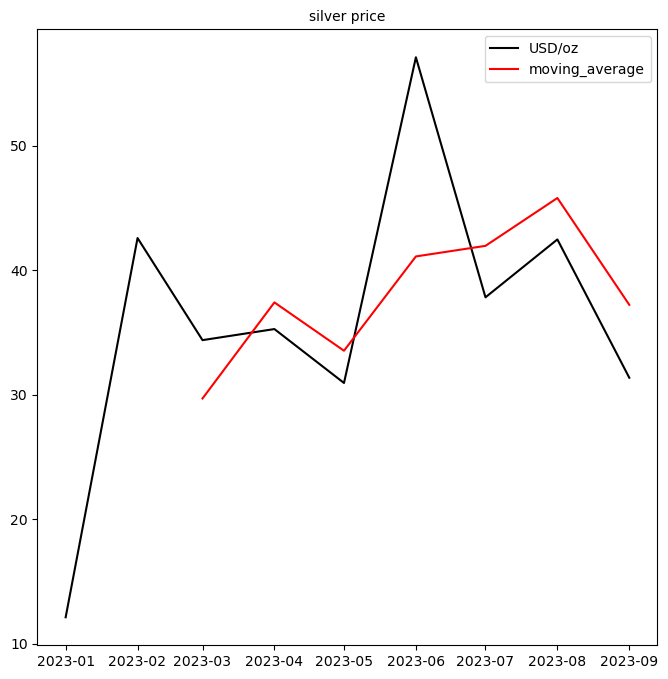

In [75]:
import pandas as pd

df = pd.DataFrame({'month' : ['2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06', '2023-07', '2023-08', '2023-09'],
                  'USD/oz' : [12.14, 42.6, 34.4, 35.29, 30.96, 57.12, 37.84, 42.49, 31.38]})

df['month'] = pd.to_datetime(df['month'], format = '%Y-%m')
df.set_index('month', inplace = True)

print(df)
moving_average = df['USD/oz'].rolling(window=3).mean()
moving_average

import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))
plt.plot(df.index, df['USD/oz'], color = 'black', label = 'USD/oz')
plt.plot(moving_average.index, moving_average, color = 'red', label = 'moving_average')
plt.legend()
plt.title('silver price', fontsize = 10)
plt.show()

## 문제 4.2
1월 대비 9월의 은의 가격은 몇 % 올랐는가? 소수점 두번째 자리에서 반올림

In [76]:
jan = df.iloc[0, 0]
sep = df.iloc[8, 0]

up_percent = round(((sep - jan) / jan) * 100, 1)

print(up_percent, '%')

158.5 %


## 문제설명 (5번)
<img src="https://github.com/Datamanim/datarepo/blob/main/adp/26/problem3.png?raw=true" width="300" height="300">

위 표는 A,B,C 자치구별 W 의원에 대한 찬성, 반대 지지를 나타낸다. 자치구별 지지율이 같은지에 대해서 검정하라

## 문제 5.1 
연구가설과 귀무가설을 설정하라

In [80]:
print('귀무가설 : 자치구별 W 의원에 대한 지지율은 다르다고 말할 수 없다.\n 연구가설 : 자치구별 W 의원에 대한 지지율은 다르다고 말할 수 있다.')

귀무가설 : 자치구별 W 의원에 대한 지지율은 다르다고 말할 수 없다.
 연구가설 : 자치구별 W 의원에 대한 지지율은 다르다고 말할 수 있다.


## 문제 5.2 
검정통계량을 구하고 결론을 내라

In [81]:
# 전체 지지율

m_all = (176+193+159) / (900)
m = m_all * 900
E_i = m / 3
print(E_i)

176.0


In [83]:
chi_squared = ((176-E_i)**2/E_i) + ((193-E_i)**2/E_i) + ((159-E_i)**2/E_i)
print(chi_squared)
print('검정통계량은 3.284이고, 유의수준 0.05에서의 카이제곱 통계량은 5.991이므로 귀무가설을 채택한다.즉, 세 자치구별 W 의원에 대한 지지율은 다르다고 말할 수 없다.')

3.284090909090909
검정통계량은 3.284이고, 유의수준 0.05에서의 카이제곱 통계량은 5.991이므로 귀무가설을 채택한다.즉, 세 자치구별 W 의원에 대한 지지율은 다르다고 말할 수 없다.


## 문제설명 (6번)
A초등학교 남학생 16명과 여학생 9명의 혈압을 측정한 pressure.csv파일을 가지고 남녀학생의 평균 혈압에 차이가 없는지 확인하려한다.
- 데이터 url :https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/26/pressure.csv

In [84]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/26/pressure.csv')

df.head()

,gender,pressure
0,male,106.8
1,male,100.8
2,male,84.5
3,male,104.2
4,male,107.0


## 문제 6.2 
검정 통계량을 구하고 가설 검정을 수행하라

In [85]:
print('귀무가설 : 남녀학생의 평균 혈압에는 차이가 있다고 말할 수 없다. \n 연구가설 : 남녀학생의 평균 혈압에는 차이가 있다고 말할 수 있다.')

귀무가설 : 남녀학생의 평균 혈압에는 차이가 있다고 말할 수 없다. 
 연구가설 : 남녀학생의 평균 혈압에는 차이가 있다고 말할 수 있다.


In [88]:
F = df[df['gender']=='female']['pressure']
M = df[df['gender']=='male']['pressure']

import scipy.stats as stats

stats.ttest_ind(F, M, equal_var = True)
print('유의수준 0.05 하에서 p-value가 더 크므로 귀무가설을 채택한다. \n 즉, 남녀학생의 평균 혈압에는 차이가 있다고 말할 수 없다.')

유의수준 0.05 하에서 p-value가 더 크므로 귀무가설을 채택한다. 
 즉, 남녀학생의 평균 혈압에는 차이가 있다고 말할 수 없다.


## 문제 6.3 
6.2의 검정 통계량 값을 바탕으로 신뢰수준 95%하에서 신뢰구간을 설정하라

In [92]:
import numpy as np

mean_M = M.mean()
mean_F = F.mean()
std_M = np.std(M)
std_F = np.std(F)
n_M = len(M)
n_F = len(F)
n_all = n_M + n_F


s = np.sqrt(0.5 * (std_M**2 + std_F**2))
sem = np.sqrt( (s**2 / n_M) + (s**2 / n_F))


t_95 = 2.069

confidence_interval_left = (mean_M - mean_F) - t_95 * sem
confidence_interval_right = (mean_M - mean_F) + t_95 * sem

print(confidence_interval_left, confidence_interval_right)

-1.66390374726023 14.279181525038064


## 문제설명 (7번)
height(키), weight(몸무게), waist(허리둘레) 컬럼을 가진 problem7.csv파일을 가지고 다음을 분석하라      
A시의 20대 남성 411명을 임의로 추출하여 키, 몸무게, 허리둘레를 조사하여 기록한 데이터이다.         
이 데이터를 이용하여 20대 남성의 키와 허리둘레가 체중에 영향을 미치는지 알아보고자 한다.     

- 데이터 url :https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/26/problem7.csv

## 문제 7.1
아래 조건을 참고하여 회귀계수(반올림하여 소수점 두자리)를 구하시오.    
- 베이지안 회귀   
- 시드넘버 1234로 지정
- 1000번의 burn-in 이후 10,000의 MCMC를 수행
- 회귀계수의 사전분포는 부적절한 균일분포(improper uniform prior distribution), 오차항의 분산의 사전분포는 역감마 분포로 지정. 이때, 형상(Shape)모수와 척도(Scale)모수는 각각 0.005로 지정.

In [93]:
import pandas as pd
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/26/problem7.csv')


##### pystan 패키지 사용 추천

## 문제 7.2
위에서 만든 모델을 바탕으로 키 180cm, 허리둘레 85cm인 남성의 몸무게를 추정하라